In [39]:
# Standard Math / Data libraries
import numpy as np
import pandas as pd

# Data Scrape Package
#import pandas_datareader.data as web

# Plotting package
import matplotlib.pyplot as plt
# Scaling Package
from sklearn.preprocessing import MinMaxScaler

# Keras Network @ https://www.tensorflow.org/guide/keras/rnn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set Random seed
import random
random.seed(2505)

In [40]:
# df = pd.read_csv("Travel_scrape.csv",parse_dates=['Search Time'], index_col='Search Time')
# df = df.drop('Unnamed: 6', axis=1)
# df.head()

In [43]:
df = pd.read_csv("Travel_scrape.csv")
# df = df.drop('Unnamed: 6', axis=1)
df.head()

,Hotel,Room Type,Check-in Date,Search Date,Search Time,Rate
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,8/3/2022,8/3/2022,0:00:00,US$254
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,8/3/2022,8/3/2022,1:00:00,US$254
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,8/3/2022,8/3/2022,2:00:00,US$254
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,8/3/2022,8/3/2022,3:00:00,US$254
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,8/3/2022,8/3/2022,4:00:00,US$254


In [44]:
#df['Search Time'] = pd.to_datetime(df['Search Time'])
#df['Search Time'] = pd.to_datetime(df['Search Time'], infer_datetime_format=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051 entries, 0 to 8050
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hotel          8051 non-null   object
 1   Room Type      8051 non-null   object
 2   Check-in Date  8051 non-null   object
 3   Search Date    8051 non-null   object
 4   Search Time    8051 non-null   object
 5   Rate           8051 non-null   object
dtypes: object(6)
memory usage: 377.5+ KB


### Preprocessing

In [46]:
df['Check-in Date'] = pd.to_datetime(df['Check-in Date'])
df['Search Date'] = pd.to_datetime(df['Search Date'])

df['Date_gap'] = df['Check-in Date'] - df['Search Date']
df['Date_gap'] = df['Date_gap'].astype(str)
df["Date_gap"]= df["Date_gap"].replace( r"days","", regex=True)

# Remove $ mark in Rate Column
df['Rate'] = df['Rate'].apply(lambda x: x[3:])
df.head()

,Hotel,Room Type,Check-in Date,Search Date,Search Time,Rate,Date_gap
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,2022-08-03,2022-08-03,0:00:00,254,0
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,2022-08-03,2022-08-03,1:00:00,254,0
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,2022-08-03,2022-08-03,2:00:00,254,0
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,2022-08-03,2022-08-03,3:00:00,254,0
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,2022-08-03,2022-08-03,4:00:00,254,0


In [47]:
df['check_in_year'] = pd.DatetimeIndex(df['Check-in Date']).year
df['check_in_month'] = pd.DatetimeIndex(df['Check-in Date']).month
df['check_in_date'] = pd.DatetimeIndex(df['Check-in Date']).day

df = df.drop('Check-in Date', axis=1)
df = df.drop('Search Date', axis=1)
df.tail()

,Hotel,Room Type,Search Time,Rate,Date_gap,check_in_year,check_in_month,check_in_date
8046,Tuscany Suites & Casino,Executive Suite,21:00:00,121,13,2022,8,20
8047,Tuscany Suites & Casino,Executive Suite,22:00:00,139,13,2022,8,20
8048,Tuscany Suites & Casino,Deluxe Executive King Non-Smoking Suite,23:00:00,168,13,2022,8,20
8049,Tuscany Suites & Casino,Executive Suite,0:00:00,143,12,2022,8,20
8050,Tuscany Suites & Casino,Executive Double Room,0:00:00,147,12,2022,8,20


In [48]:
df1 = df.copy()
df1.head()

,Hotel,Room Type,Search Time,Rate,Date_gap,check_in_year,check_in_month,check_in_date
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,0:00:00,254,0,2022,8,3
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,1:00:00,254,0,2022,8,3
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,2:00:00,254,0,2022,8,3
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,3:00:00,254,0,2022,8,3
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,4:00:00,254,0,2022,8,3


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import train_test_split

In [50]:
for i in df1.select_dtypes('object').columns:
    encoder = LabelEncoder()
    df1[i] = encoder.fit_transform(df1[i])

In [51]:
df1.tail()

,Hotel,Room Type,Search Time,Rate,Date_gap,check_in_year,check_in_month,check_in_date
8046,6,19,13,20,6,2022,8,20
8047,6,19,14,33,6,2022,8,20
8048,6,8,15,57,6,2022,8,20
8049,6,19,0,37,5,2022,8,20
8050,6,14,0,41,5,2022,8,20


In [58]:
df1 = df1[['Hotel','Room Type','Search Time','Date_gap','check_in_year','check_in_month','check_in_date','Rate']]
df1.head()

,Hotel,Room Type,Search Time,Date_gap,check_in_year,check_in_month,check_in_date,Rate
0,0,24,0,1,2022,8,3,85
1,0,24,11,1,2022,8,3,85
2,0,24,16,1,2022,8,3,85
3,0,24,17,1,2022,8,3,85
4,0,24,18,1,2022,8,3,85


## Normalization

In [59]:
x = df1.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

In [60]:
df2.tail()

,0,1,2,3,4,5,6,7
8046,1.0,0.59375,0.565217,0.428571,0.0,0.0,1.0,0.112360
8047,1.0,0.59375,0.608696,0.428571,0.0,0.0,1.0,0.185393
8048,1.0,0.25000,0.652174,0.428571,0.0,0.0,1.0,0.320225
8049,1.0,0.59375,0.000000,0.357143,0.0,0.0,1.0,0.207865
8050,1.0,0.43750,0.000000,0.357143,0.0,0.0,1.0,0.230337


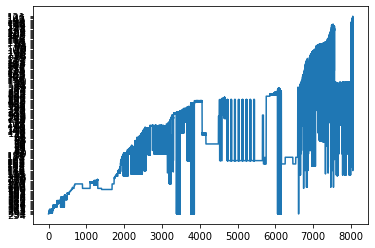

In [61]:
plt.plot(df['Rate'])

# Multi-Variate Forecasting
## Using our Training and Testing sets, Let's create our inputs.

In [64]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(df2.shape[0] - samples):
    X.append(df2.iloc[i:i+samples, 0:7].values) # Independent Samples
    Y.append(df2.iloc[i+samples, 7:].values) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[0.        , 0.75      , 0.        , 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 0.47826087, 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 0.69565217, 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 0.73913043, 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 0.7826087 , 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 0.82608696, 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 0.86956522, 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 0.91304348, 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 0.95652174, 0.07142857, 0.        ,
        0.        , 0.        ],
       [0.        , 0.75      , 1.        , 0.07142857, 0.

In [65]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

Dimensions of X (8041, 10, 7) Dimensions of Y (8041, 1)


In [66]:
# # Get the training and testing set
threshold = round(0.9 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY =  X[threshold:], Y[threshold:]
print('Training Length',trainX.shape, trainY.shape,'Testing Length:',testX.shape, testY.shape)


Training Length (7237, 10, 7) (7237, 1) Testing Length: (804, 10, 7) (804, 1)


In [67]:
# Let's build the RNN
model = keras.Sequential()

# Add a RNN layer with 30 internal units.
model.add(layers.SimpleRNN(30,
                           activation = 'tanh',
                           use_bias=True,
                           input_shape=(trainX.shape[1], trainX.shape[2])))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
model.add(layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
model.add(layers.Dense(1))

# Evaluating loss function of MSE using the adam optimizer.
model.compile(loss='mean_squared_error', optimizer = 'adam')

# Print out architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                1140      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Fitting the data
history = model.fit(trainX,
                    trainY,
                    shuffle = False, # Since this is time series data
                    epochs=1000,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

Epoch 1/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0231 - val_loss: 0.0615
Epoch 2/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0195 - val_loss: 0.0712
Epoch 3/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0197 - val_loss: 0.0743
Epoch 4/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0179 - val_loss: 0.0693
Epoch 5/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0199 - val_loss: 0.0760
Epoch 6/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0204 - val_loss: 0.0621
Epoch 7/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0206 - val_loss: 0.0751
Epoch 8/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0185 - val_loss: 0.0709
Epoch 9/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0180 - val_loss: 0.0733
Epoch 10/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.019

181/181 [==============================] - 1s 3ms/step - loss: 0.0207 - val_loss: 0.0822
Epoch 81/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0197 - val_loss: 0.0877
Epoch 82/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0224 - val_loss: 0.0682
Epoch 83/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0192 - val_loss: 0.0798
Epoch 84/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0191 - val_loss: 0.0825
Epoch 85/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0172 - val_loss: 0.0742
Epoch 86/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0174 - val_loss: 0.0725
Epoch 87/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0178 - val_loss: 0.0681
Epoch 88/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0177 - val_loss: 0.0660
Epoch 89/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0209 - v

181/181 [==============================] - 1s 3ms/step - loss: 0.0283 - val_loss: 0.0866
Epoch 160/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0215 - val_loss: 0.0686
Epoch 161/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0188 - val_loss: 0.0642
Epoch 162/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0182 - val_loss: 0.0671
Epoch 163/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 0.0770
Epoch 164/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0239 - val_loss: 0.1002
Epoch 165/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0193 - val_loss: 0.0839
Epoch 166/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0178 - val_loss: 0.0691
Epoch 167/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0177 - val_loss: 0.0805
Epoch 168/1000
181/181 [==============================] - 1s 3ms/step - loss: 0

Epoch 238/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0232 - val_loss: 0.0773
Epoch 239/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0697
Epoch 240/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0200 - val_loss: 0.0722
Epoch 241/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0168 - val_loss: 0.0846
Epoch 242/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0171 - val_loss: 0.0698
Epoch 243/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0159 - val_loss: 0.0772
Epoch 244/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0161 - val_loss: 0.0785
Epoch 245/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0161 - val_loss: 0.0770
Epoch 246/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0179 - val_loss: 0.0987
Epoch 247/1000
181/181 [==============================] - 1s 3ms

Epoch 317/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0191 - val_loss: 0.0821
Epoch 318/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0230 - val_loss: 0.0987
Epoch 319/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0197 - val_loss: 0.0723
Epoch 320/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0228 - val_loss: 0.0751
Epoch 321/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0163 - val_loss: 0.0649
Epoch 322/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0168 - val_loss: 0.0820
Epoch 323/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0166 - val_loss: 0.0748
Epoch 324/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0182 - val_loss: 0.0760
Epoch 325/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0220 - val_loss: 0.0864
Epoch 326/1000
181/181 [==============================] - 1s 3ms

Epoch 396/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0716
Epoch 397/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0150 - val_loss: 0.0677
Epoch 398/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0154 - val_loss: 0.0672
Epoch 399/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0176 - val_loss: 0.0715
Epoch 400/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0174 - val_loss: 0.0805
Epoch 401/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0170 - val_loss: 0.0678
Epoch 402/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0184 - val_loss: 0.0820
Epoch 403/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0199 - val_loss: 0.0655
Epoch 404/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0195 - val_loss: 0.0713
Epoch 405/1000
181/181 [==============================] - 1s 3ms

Epoch 475/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0141 - val_loss: 0.0747
Epoch 476/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0681
Epoch 477/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0147 - val_loss: 0.0757
Epoch 478/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0133 - val_loss: 0.0699
Epoch 479/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0138 - val_loss: 0.0715
Epoch 480/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0746
Epoch 481/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0139 - val_loss: 0.0746
Epoch 482/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0157 - val_loss: 0.0767
Epoch 483/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0159 - val_loss: 0.0806
Epoch 484/1000
181/181 [==============================] - 1s 3ms

Epoch 554/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0466 - val_loss: 0.0968
Epoch 555/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0315 - val_loss: 0.1048
Epoch 556/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0306 - val_loss: 0.0895
Epoch 557/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0254 - val_loss: 0.1062
Epoch 558/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0229 - val_loss: 0.0940
Epoch 559/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0210 - val_loss: 0.0984
Epoch 560/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0199 - val_loss: 0.0928
Epoch 561/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0198 - val_loss: 0.0893
Epoch 562/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0195 - val_loss: 0.0903
Epoch 563/1000
181/181 [==============================] - 1s 3ms

Epoch 633/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0295 - val_loss: 0.0908
Epoch 634/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0222 - val_loss: 0.0918
Epoch 635/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0211 - val_loss: 0.0913
Epoch 636/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0177 - val_loss: 0.0869
Epoch 637/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0900
Epoch 638/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0174 - val_loss: 0.0829
Epoch 639/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0792
Epoch 640/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0188 - val_loss: 0.0784
Epoch 641/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0185 - val_loss: 0.0844
Epoch 642/1000
181/181 [==============================] - 1s 3ms

Epoch 712/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0163 - val_loss: 0.0855
Epoch 713/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0163 - val_loss: 0.0767
Epoch 714/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0148 - val_loss: 0.0855
Epoch 715/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0145 - val_loss: 0.0856
Epoch 716/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0146 - val_loss: 0.0771
Epoch 717/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0161 - val_loss: 0.0821
Epoch 718/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0170 - val_loss: 0.0757
Epoch 719/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0170 - val_loss: 0.0910
Epoch 720/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0864
Epoch 721/1000
181/181 [==============================] - 1s 3ms

Epoch 791/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0160 - val_loss: 0.0876
Epoch 792/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0832
Epoch 793/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0138 - val_loss: 0.0836
Epoch 794/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0159 - val_loss: 0.0847
Epoch 795/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0141 - val_loss: 0.0794
Epoch 796/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0143 - val_loss: 0.0809
Epoch 797/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0859
Epoch 798/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0169 - val_loss: 0.0805
Epoch 799/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0165 - val_loss: 0.0741
Epoch 800/1000
181/181 [==============================] - 1s 3ms

Epoch 870/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0132 - val_loss: 0.0808
Epoch 871/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 0.0770
Epoch 872/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0168 - val_loss: 0.0781
Epoch 873/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0167 - val_loss: 0.0796
Epoch 874/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0179 - val_loss: 0.0816
Epoch 875/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0219 - val_loss: 0.0821
Epoch 876/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0232 - val_loss: 0.0819
Epoch 877/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0268 - val_loss: 0.0781
Epoch 878/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0239 - val_loss: 0.0791
Epoch 879/1000
181/181 [==============================] - 1s 3ms

Epoch 949/1000
181/181 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0918
Epoch 950/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0159 - val_loss: 0.0894
Epoch 951/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0166 - val_loss: 0.0847
Epoch 952/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0152 - val_loss: 0.0939
Epoch 953/1000
181/181 [==============================] - 1s 5ms/step - loss: 0.0162 - val_loss: 0.0926
Epoch 954/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0151 - val_loss: 0.0870
Epoch 955/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0143 - val_loss: 0.0841
Epoch 956/1000
181/181 [==============================] - 1s 3ms/step - loss: 0.0149 - val_loss: 0.0854
Epoch 957/1000
181/181 [==============================] - 1s 4ms/step - loss: 0.0147 - val_loss: 0.0833
Epoch 958/1000
181/181 [==============================] - 1s 3ms

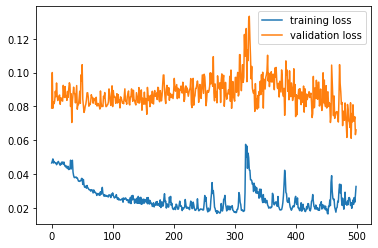

In [76]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)

26/26 [==============================] - 0s 2ms/step


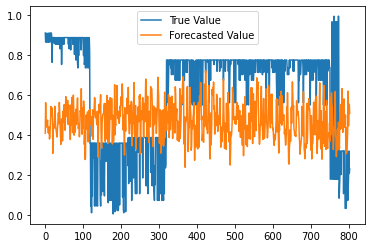

In [77]:
# This is a one step forecast (based on how we constructed our model)
y_pred = model.predict(testX)
plt.plot(testY, label = 'True Value')
plt.plot(y_pred, label = 'Forecasted Value')
plt.legend()

26/26 [==============================] - 0s 2ms/step


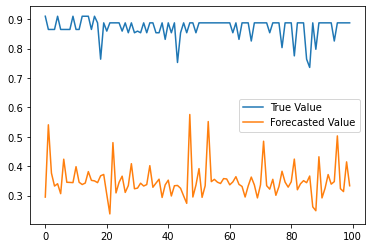

In [81]:
# This is a one step forecast (based on how we constructed our model)
y_pred = model.predict(testX)
plt.plot(testY[:100], label = 'True Value')
plt.plot(y_pred[:100], label = 'Forecasted Value')
plt.legend()

In [80]:
#len(X[threshold:])